In [2]:
import json
import numpy as np
import seaborn as sns
from heteromodes.utils import load_hmap
from neuromaps.datasets import fetch_fslr
import nibabel as nib
import matplotlib.pyplot as plt

In [3]:
with open(f"{PROJ_DIR}/scripts/model_rest/results_config.json", "r") as f:
    config = json.load(f)

hmap_labels = config["hmap_labels"]
hmap_labels_plotting = config["hmap_labels_plotting"]
den = "4k"
medmask = nib.load(f"{PROJ_DIR}/data/empirical/fsLR-4k_medmask.label.gii").darrays[0].data.astype(bool)
# medmask = nib.load(fetch_fslr(den)["medial"][0]).darrays[0].data.astype(bool)

hmaps = []
for hmap_label in hmap_labels[1:]:
    hmap = load_hmap(hmap_label, den)
    hmaps.append(hmap[medmask])

hmaps = np.array(hmaps).T
print(hmaps.shape)

(3619, 8)


In [4]:
np.sum(medmask)

3619

In [5]:
for i in range(len(hmap_labels)-1):
    nanmask = np.isnan(hmaps[:, i])
    print(f"{hmap_labels[i+1]} has {np.sum(nanmask)} NaNs")

myelinmap has 0 NaNs
thickness has 0 NaNs
synapticden has 0 NaNs
odi has 0 NaNs
ndi has 0 NaNs
genel4PC1 has 0 NaNs
megtimescale has 0 NaNs
eiratio2.2 has 0 NaNs


(8, 8)


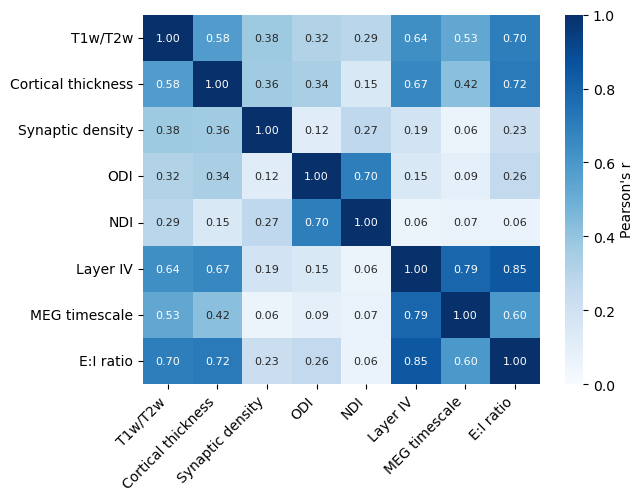

In [6]:
corrs = np.abs(np.corrcoef(hmaps.T))
print(corrs.shape)

sns.heatmap(corrs, xticklabels=hmap_labels_plotting[1:], yticklabels=hmap_labels_plotting[1:],
            cbar_kws={"label": "Pearson's r"}, vmin=0, vmax=1, cmap="Blues", annot=True, fmt=".2f", annot_kws={"fontsize": 8})
plt.gca().tick_params(axis='x', labelrotation=45)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.show()

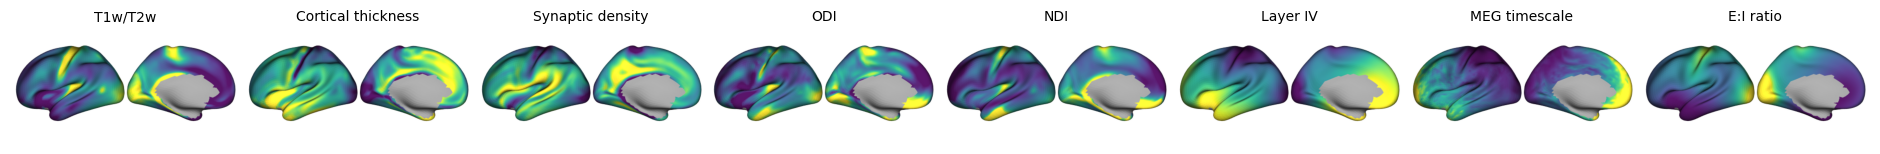

In [7]:
from heteromodes.utils import unmask
from heteromodes.plotting import plot_brain
from neuromaps.datasets import fetch_fslr

surf = fetch_fslr(den)["inflated"][0]

fig = plot_brain(surf, unmask(hmaps, medmask), labels=hmap_labels_plotting[1:], clim_q=(5, 95), cbar=False,
                  cbar_kws=dict(fontsize=25))


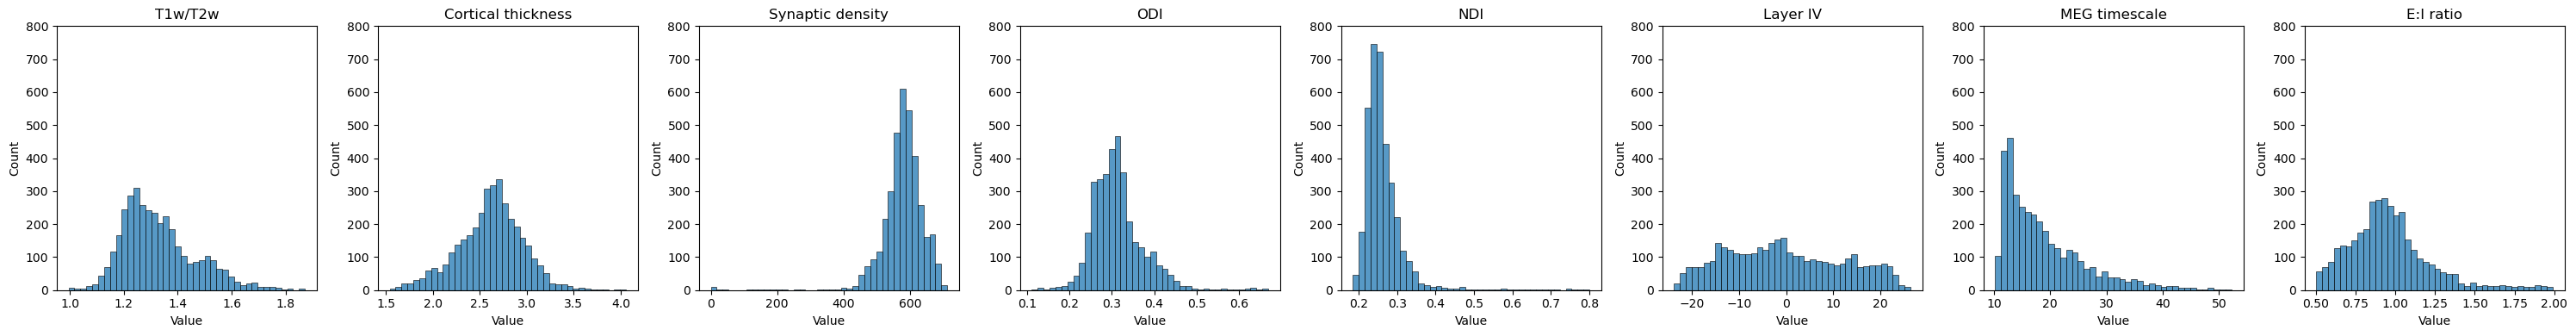

In [12]:
# Plot histograms of hmaps

fig, axes = plt.subplots(1, len(hmap_labels)-1, figsize=(30, 4))
for i, ax in enumerate(axes):
    sns.histplot(hmaps[:, i], ax=ax, bins=40)
    ax.set_title(hmap_labels_plotting[i+1])
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
    ax.set_ylim(0, 800)
plt.tight_layout()